In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gc
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

In [2]:
folderPath = "D:\Competitions\CorporationGrocerySalesPrediction"

In [3]:
fileName = "grosstrain.01.csv"
#fileName = "train.csv"
filePath = os.path.join(folderPath,fileName)
types = {
    'item_nbr':'int32',
    'store_nbr':'int16',
    'unit_sales':'float32'
}
data = pd.read_csv(filePath
                   ,index_col = ['item_nbr','store_nbr']
                   ,usecols=['date','store_nbr','item_nbr','unit_sales']
                   ,dtype=types
                   ,parse_dates=['date']
                   ,infer_datetime_format=True
                   ,low_memory=True
                  )
#data.head(3)

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 125497040 entries, (103665, 25) to (2116416, 54)
Data columns (total 2 columns):
date          datetime64[ns]
unit_sales    float32
dtypes: datetime64[ns](1), float32(1)
memory usage: 1.8 GB


In [4]:
del(data)

In [5]:
#reading test file
fileName = "test.csv"
filePath = os.path.join(folderPath,fileName)
test = pd.read_csv(filePath,usecols=['id','store_nbr','item_nbr'],index_col=['item_nbr','store_nbr'])
test.head(10)

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,,id
item_nbr,store_nbr,
96995,1,125497040
99197,1,125497041
103501,1,125497042
103520,1,125497043
103665,1,125497044
105574,1,125497045
105575,1,125497046
105576,1,125497047
105577,1,125497048


In [ ]:
del(test)

# Analysis

In [6]:
data = data.groupby(['item_nbr','store_nbr']).agg({'unit_sales':'mean'})
data['unit_sales'] = round(data['unit_sales']).astype('int32')

In [8]:
len(test)

3370464

In [9]:
test.join(data,how='left').fillna(0).to_csv(os.path.join(folderPath,'submission1Test.csv')
                                            ,float_format="%.2f"
                                            ,index=None)

In [7]:
gc.collect()

4726

In [ ]:
#reading sample submission
fileName = "sample_submission.csv"
filePath = os.path.join(folderPath,fileName)
submission = pd.read_csv(filePath)
submission.head(10)

In [ ]:
del(submission)
gc.collect()

In [35]:
#reading items submission
fileName = "items.csv"
filePath = os.path.join(folderPath,fileName)
items = pd.read_csv(filePath)
items.head(10)

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
5,105574,GROCERY I,1045,0
6,105575,GROCERY I,1045,0
7,105576,GROCERY I,1045,0
8,105577,GROCERY I,1045,0
9,105693,GROCERY I,1034,0


In [36]:
del(items)
gc.collect()

102

In [37]:
#reading holiday_events submission
fileName = "holidays_events.csv"
filePath = os.path.join(folderPath,fileName)
holidays_events = pd.read_csv(filePath)
holidays_events.head(10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [38]:
del(holidays_events)
gc.collect()

151

In [39]:
#reading stores submission
fileName = "stores.csv"
filePath = os.path.join(folderPath,fileName)
stores = pd.read_csv(filePath)
stores.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [40]:
del(stores)
gc.collect()

125

In [41]:
#reading transactions submission
fileName = "transactions.csv"
filePath = os.path.join(folderPath,fileName)
transactions = pd.read_csv(filePath)
transactions.head(10)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [42]:
del(transactions)
gc.collect()

24

In [ ]:
fileNameTemp = "grosstrain."
for i in range(1,21):
    print("{0}{1:02d}".format(fileNameTemp,i))

## Creating on subset

In [3]:
#fileName = "grosstrain.01.csv"
fileName = "train.csv"
filePath = os.path.join(folderPath,fileName)
types = {
    'item_nbr':'int32',
    'store_nbr':'int16',
    'unit_sales':'float32',
}
data = pd.read_csv(filePath
                   ,index_col="id"
                   ,dtype=types
                   ,parse_dates=['date']
                   ,low_memory=True
                  )

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125497040 entries, 0 to 125497039
Data columns (total 5 columns):
date           datetime64[ns]
store_nbr      int16
item_nbr       int32
unit_sales     float32
onpromotion    object
dtypes: datetime64[ns](1), float32(1), int16(1), int32(1), object(1)
memory usage: 4.0+ GB


,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
0,2013-01-01,25,103665,7.0,NaN
1,2013-01-01,25,105574,1.0,NaN
2,2013-01-01,25,105575,2.0,NaN
3,2013-01-01,25,108079,1.0,NaN
4,2013-01-01,25,108701,1.0,NaN


In [6]:
len(data[data["store_nbr"].between(1,5)])

14448502

In [6]:
data[data["store_nbr"].between(1,4)].to_csv(os.path.join(folderPath,'trainstore1to4.csv')
                                            ,float_format="%.2f")

In [7]:
del(data)

In [8]:
gc.collect()

87

## Working for store 25

In [16]:
fileName = "trainstore25.csv"
filePath = os.path.join(folderPath,fileName)
types = {
    'id':'int32',
    'item_nbr':'int64',
    'store_nbr':'int64',
    'unit_sales':'float64'
}
data = pd.read_csv(filePath
                   ,usecols=['id','store_nbr','date','item_nbr','unit_sales','onpromotion']
                   ,dtype=types
                   ,parse_dates=['date'],
                   low_memory=False
                  )

In [17]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057020 entries, 0 to 2057019
Data columns (total 6 columns):
id             int32
date           datetime64[ns]
store_nbr      int64
item_nbr       int64
unit_sales     float64
onpromotion    object
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(1)
memory usage: 86.3+ MB


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


### Data Cleaning

In [18]:
data.drop("id",axis = 1,inplace=True)

In [19]:
data["onpromotion"].fillna(False,inplace=True)

In [20]:
data["onpromotion"] = data["onpromotion"].astype("bool")

In [52]:
onpromotion={True : 1,False: 0}
data["onpromotion"]=data["onpromotion"].map(onpromotion)
data["onpromotion"] = data["onpromotion"].astype(np.int8)

In [22]:
data.loc[(data.unit_sales<0),'unit_sales'] = 0 # eliminate negatives

In [ ]:
data['unit_sales'] =  data['unit_sales'].apply(pd.np.log1p) #logarithm conversion

In [23]:
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)
#data.set_index("id",inplace=True)
#data.sort_index(inplace=True)

In [27]:
data["store_nbr"] = data["store_nbr"].astype(np.int8)
data["item_nbr"] = data["item_nbr"].astype(np.int32)
data["unit_sales"] = data["unit_sales"].astype(np.int32)
data["onpromotion"] = data["onpromotion"].astype(np.bool)

In [53]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057020 entries, 0 to 2057019
Data columns (total 9 columns):
date           datetime64[ns]
store_nbr      int8
item_nbr       int32
unit_sales     int32
onpromotion    int8
Year           int32
Month          int8
Day            uint8
DOW            uint8
dtypes: datetime64[ns](1), int32(3), int8(3), uint8(2)
memory usage: 49.0 MB


,date,store_nbr,item_nbr,unit_sales,onpromotion,Year,Month,Day,DOW
0,2013-01-01,25,103665,7,0,1,1,1,1
1,2013-01-01,25,105574,1,0,1,1,1,1
2,2013-01-01,25,105575,2,0,1,1,1,1
3,2013-01-01,25,108079,1,0,1,1,1,1
4,2013-01-01,25,108701,1,0,1,1,1,1


## Developing features

In [48]:
data["Year"] = pd.DatetimeIndex(data["date"]).year
data["Year"] = data['Month'].astype(np.int32)

In [46]:
data['Month'] = pd.DatetimeIndex(data['date']).month.astype(np.int8)
data['Month'] = data['Month'].astype(np.int8)

In [44]:
data['Day'] =pd.DatetimeIndex(data['date']).day
data['Day'] = data['Day'].astype(np.uint8)

In [42]:
data['DOW'] = pd.DatetimeIndex(data['date']).dayofweek
data['DOW'] = data['DOW'].astype(np.uint8)

In [49]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057020 entries, 0 to 2057019
Data columns (total 9 columns):
date           datetime64[ns]
store_nbr      int8
item_nbr       int32
unit_sales     int32
onpromotion    bool
Year           int32
Month          int8
Day            uint8
DOW            uint8
dtypes: bool(1), datetime64[ns](1), int32(3), int8(2), uint8(2)
memory usage: 49.0 MB


,date,store_nbr,item_nbr,unit_sales,onpromotion,Year,Month,Day,DOW
0,2013-01-01,25,103665,7,False,1,1,1,1
1,2013-01-01,25,105574,1,False,1,1,1,1
2,2013-01-01,25,105575,2,False,1,1,1,1
3,2013-01-01,25,108079,1,False,1,1,1,1
4,2013-01-01,25,108701,1,False,1,1,1,1


### Creating Train and test Set

In [181]:
train,test = data[data['date']<'2017-01-01'],data[data['date']>='2017-01-01']

In [182]:
features = ['item_nbr','onpromotion','Year','Month','Day','DOW']

#### Using Mean

In [183]:
trainingmatrix = train.groupby(['item_nbr','onpromotion']).agg({'unit_sales':'median'})

In [184]:
test = test.join(trainingmatrix,how='left',on=['item_nbr','onpromotion'],rsuffix='_pred')

In [185]:
test['unit_sales_pred'].fillna(0,inplace=True)

#### Using Linear model Linear Regression

In [135]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [136]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [137]:
print('Training with features' + str(features))
# Train the model using the training sets
regr.fit(train[features], train['unit_sales'])

Training with features['item_nbr', 'onpromotion', 'Year', 'Month', 'Day', 'DOW']


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:
regr.coef_

array([  5.35980968e-07,   4.17287876e+00,  -1.83996370e-01,
        -6.57882474e-02,   1.27300501e-02,   2.65184923e-01])

In [139]:
test['unit_sales_pred'] = regr.predict(test[features])

#### Using Neural Network

In [190]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [194]:
model = Sequential()
model.add(Dense(50, input_dim=6, activation='relu'))
model.add(Dense(1,))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [200]:
model.fit(train[features].values, train['unit_sales'].values,
          batch_size=10,epochs=2,verbose=1,
          validation_data=(test[features].values, test['unit_sales'].values))

Train on 1667503 samples, validate on 389517 samples
Epoch 1/2
1667503/1667503 [==============================] - 215s - loss: 1977.7709 - val_loss: 424.4553
Epoch 2/2
1667503/1667503 [==============================] - 200s - loss: 254.0841 - val_loss: 175.6062


In [210]:
testPredict = model.predict(test[features].values)
test['unit_sales_pred'] = testPredict

## Evaluation

In [213]:
test['unit_sales_pred'].fillna(0,inplace=True)


In [214]:
print("Mean squared error: %.2f"
      % mean_squared_error(test["unit_sales"],test['unit_sales_pred']))
print("R2 square: %.2f"
     % r2_score(test["unit_sales"],test['unit_sales_pred']))

Mean squared error: 175.61
R2 square: -0.00


In [ ]:
#test['unit_sales_pred'] =  test['unit_sales_pred'].apply(pd.np.expm1)

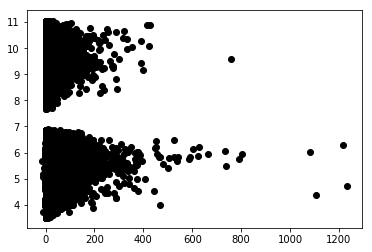

In [40]:
# Plot outputs
plt.scatter(test['unit_sales'], test['unit_sales_pred'],  color='black')
#plt.plot(test['unit_sales'], test['unit_sales_pred'], color='blue', linewidth=3)

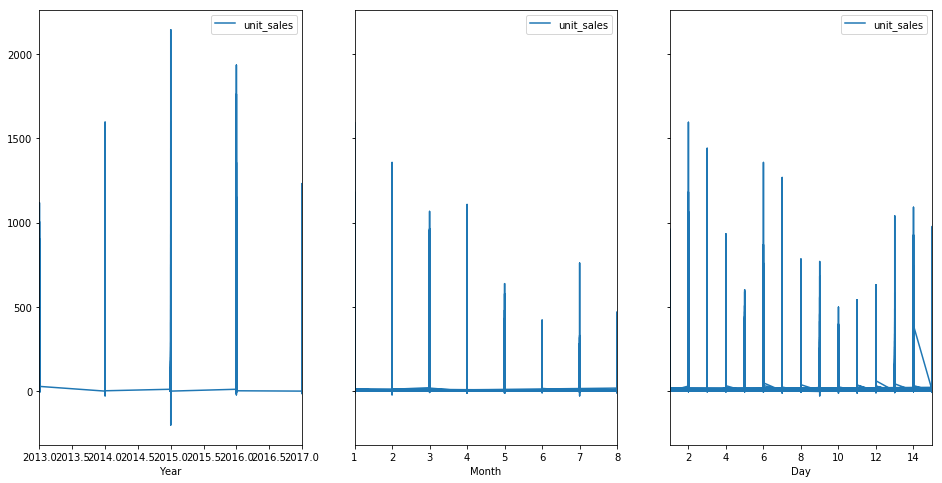

In [28]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot( x='Year', y='unit_sales', ax=axs[0], figsize=(16, 8))
data.plot(x='Month', y='unit_sales', ax=axs[1])
data.plot(x='Day', y='unit_sales', ax=axs[2])